In [58]:
import pandas as pd


In [59]:
df = pd.read_csv('troop_movements.csv')

In [60]:
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-02-07 09:59:57,1,resistance_soldier,resistance,3,4,9,8,Eriadu
1,2024-02-07 09:59:56,2,at-st,empire,2,6,2,9,Stewjon
2,2024-02-07 09:59:55,3,tie_fighter,resistance,1,6,8,3,Iridonia
3,2024-02-07 09:59:54,4,stormtrooper,empire,4,1,3,10,Concord Dawn
4,2024-02-07 09:59:53,5,tie_silencer,empire,10,9,8,8,Corellia


In [61]:
import sklearn as sk
import numpy as np
import seaborn as sns

In [62]:
df[df == '1'].count() #Resistance count = 522, empire count = 488, 52.2% ; 48.8%

timestamp               0
unit_id                 0
unit_type               0
empire_or_resistance    0
location_x              0
location_y              0
destination_x           0
destination_y           0
homeworld               0
dtype: int64

In [63]:
len(df)

1000

In [64]:
c = df.loc[:,["empire_or_resistance"]]
c[c=="resistance"].count(), c[c =="empire"].count()

#resistance = 510
#empire = 490


(empire_or_resistance    510
 dtype: int64,
 empire_or_resistance    490
 dtype: int64)

In [65]:
df_h = df.groupby(["homeworld"], as_index=False)["unit_id"].count()
df_h.rename(columns={"unit_id":"count"}, inplace=True)
df_h.head(10)

,homeworld,count
0,Alderaan,20
1,Aleen Minor,17
2,Bestine IV,19
3,Cerea,18
4,Champala,26
5,Chandrila,24
6,Concord Dawn,23
7,Corellia,24
8,Dagobah,29
9,Dathomir,26


In [66]:
df_h = df.groupby(["unit_type"], as_index=False)["unit_id"].count()
df_h.rename(columns={"unit_id":"count"}, inplace=True)
df_h.head(10)

,unit_type,count
0,at-at,115
1,at-st,124
2,resistance_soldier,129
3,stormtrooper,123
4,tie_fighter,124
5,tie_silencer,131
6,unknown,129
7,x-wing,125


In [67]:
df.head()


,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-02-07 09:59:57,1,resistance_soldier,resistance,3,4,9,8,Eriadu
1,2024-02-07 09:59:56,2,at-st,empire,2,6,2,9,Stewjon
2,2024-02-07 09:59:55,3,tie_fighter,resistance,1,6,8,3,Iridonia
3,2024-02-07 09:59:54,4,stormtrooper,empire,4,1,3,10,Concord Dawn
4,2024-02-07 09:59:53,5,tie_silencer,empire,10,9,8,8,Corellia


In [68]:
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-02-07 09:59:57,1,resistance_soldier,resistance,3,4,9,8,Eriadu
1,2024-02-07 09:59:56,2,at-st,empire,2,6,2,9,Stewjon
2,2024-02-07 09:59:55,3,tie_fighter,resistance,1,6,8,3,Iridonia
3,2024-02-07 09:59:54,4,stormtrooper,empire,4,1,3,10,Concord Dawn
4,2024-02-07 09:59:53,5,tie_silencer,empire,10,9,8,8,Corellia


In [69]:

is_resistance = str()
df['is_resistance'] = is_resistance

In [70]:
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-02-07 09:59:57,1,resistance_soldier,resistance,3,4,9,8,Eriadu,
1,2024-02-07 09:59:56,2,at-st,empire,2,6,2,9,Stewjon,
2,2024-02-07 09:59:55,3,tie_fighter,resistance,1,6,8,3,Iridonia,
3,2024-02-07 09:59:54,4,stormtrooper,empire,4,1,3,10,Concord Dawn,
4,2024-02-07 09:59:53,5,tie_silencer,empire,10,9,8,8,Corellia,


In [71]:



df.loc[df['empire_or_resistance']=="resistance", 'is_resistance'] = "True"
df.loc[df['empire_or_resistance']=="empire", 'is_resistance'] = "False"

In [72]:
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-02-07 09:59:57,1,resistance_soldier,resistance,3,4,9,8,Eriadu,True
1,2024-02-07 09:59:56,2,at-st,empire,2,6,2,9,Stewjon,False
2,2024-02-07 09:59:55,3,tie_fighter,resistance,1,6,8,3,Iridonia,True
3,2024-02-07 09:59:54,4,stormtrooper,empire,4,1,3,10,Concord Dawn,False
4,2024-02-07 09:59:53,5,tie_silencer,empire,10,9,8,8,Corellia,False


Text(0, 0.5, 'Count')

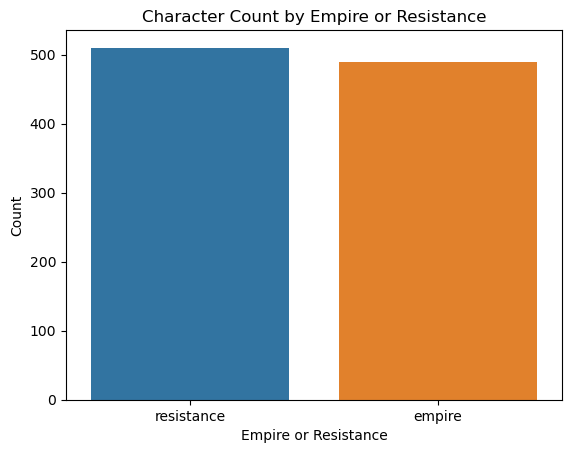

In [73]:
import matplotlib.pyplot as plt
sns.countplot(df, x = 'empire_or_resistance').set(title="Character Count by Empire or Resistance")
plt.xlabel('Empire or Resistance')
plt.ylabel('Count')



In [74]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [75]:
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-02-07 09:59:57,1,resistance_soldier,resistance,3,4,9,8,Eriadu,True
1,2024-02-07 09:59:56,2,at-st,empire,2,6,2,9,Stewjon,False
2,2024-02-07 09:59:55,3,tie_fighter,resistance,1,6,8,3,Iridonia,True
3,2024-02-07 09:59:54,4,stormtrooper,empire,4,1,3,10,Concord Dawn,False
4,2024-02-07 09:59:53,5,tie_silencer,empire,10,9,8,8,Corellia,False


In [76]:
from sklearn import preprocessing  
from sklearn.preprocessing import LabelEncoder

#df_copy = df.copy()
#df_copy.homeworld = LabelEncoder().fit_transform ( df_lbl_enc.homeworld )
#df_copy.unit_type = LabelEncoder().fit_transform ( df_lbl_enc.unit_type )

In [77]:
feature = ['homeworld', 'unit_type']

x = df[feature]
x_encoded = pd.get_dummies(x)
y = df.is_resistance

In [78]:
x_encoded

,homeworld_Alderaan,homeworld_Aleen Minor,homeworld_Bestine IV,homeworld_Cerea,homeworld_Champala,homeworld_Chandrila,homeworld_Concord Dawn,homeworld_Corellia,homeworld_Dagobah,homeworld_Dathomir,...,homeworld_Vulpter,homeworld_Zolan,unit_type_at-at,unit_type_at-st,unit_type_resistance_soldier,unit_type_stormtrooper,unit_type_tie_fighter,unit_type_tie_silencer,unit_type_unknown,unit_type_x-wing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
996,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [79]:
x_encoded.iloc[2]

homeworld_Alderaan              0
homeworld_Aleen Minor           0
homeworld_Bestine IV            0
homeworld_Cerea                 0
homeworld_Champala              0
homeworld_Chandrila             0
homeworld_Concord Dawn          0
homeworld_Corellia              0
homeworld_Dagobah               0
homeworld_Dathomir              0
homeworld_Dorin                 0
homeworld_Eriadu                0
homeworld_Glee Anselm           0
homeworld_Haruun Kal            0
homeworld_Iktotch               0
homeworld_Iridonia              1
homeworld_Kalee                 0
homeworld_Kashyyyk              0
homeworld_Malastare             0
homeworld_Mirial                0
homeworld_Mon Cala              0
homeworld_Muunilinst            0
homeworld_Naboo                 0
homeworld_Ojom                  0
homeworld_Quermia               0
homeworld_Rodia                 0
homeworld_Ryloth                0
homeworld_Serenno               0
homeworld_Shili                 0
homeworld_Skak

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=0)

In [81]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)


In [82]:
import sklearn.metrics as metrics
print(metrics.accuracy_score(y_test, y_pred))



0.64


In [83]:


# Get feature importances
importances = model.feature_importances_
# Create a DataFrame to hold the feature importances
feature_importances = pd.DataFrame({'Feature': x_encoded.columns, 'Importance': importances})



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'homeworld_Alderaan'),
  Text(1, 0, 'homeworld_Aleen Minor'),
  Text(2, 0, 'homeworld_Bestine IV'),
  Text(3, 0, 'homeworld_Cerea'),
  Text(4, 0, 'homeworld_Champala'),
  Text(5, 0, 'homeworld_Chandrila'),
  Text(6, 0, 'homeworld_Concord Dawn'),
  Text(7, 0, 'homeworld_Corellia'),
  Text(8, 0, 'homeworld_Dagobah'),
  Text(9, 0, 'homeworld_Dathomir'),
  Text(10, 0, 'homeworld_Dorin'),
  Text(11, 0, 'homeworld_Eriadu'),
  Text(12, 0, 'homeworld_Glee Anselm'),
  Text(13, 0, 'homeworld_Haruun Kal'),
  Text(14, 0, 'homeworld_Iktotch'),
  Text(15, 0, 'homeworld_Iridonia'),
  Text(16, 0, 'homeworld_Kalee'),
  Text(17, 0, 'homeworld_Kashyyyk'),
  Text(18, 0, 'homeworld_Malastare'),
  Text(19, 0, 'homeworld_Mirial'),
  Text(20, 0, 'homeworld_Mon Cala'),
  Text

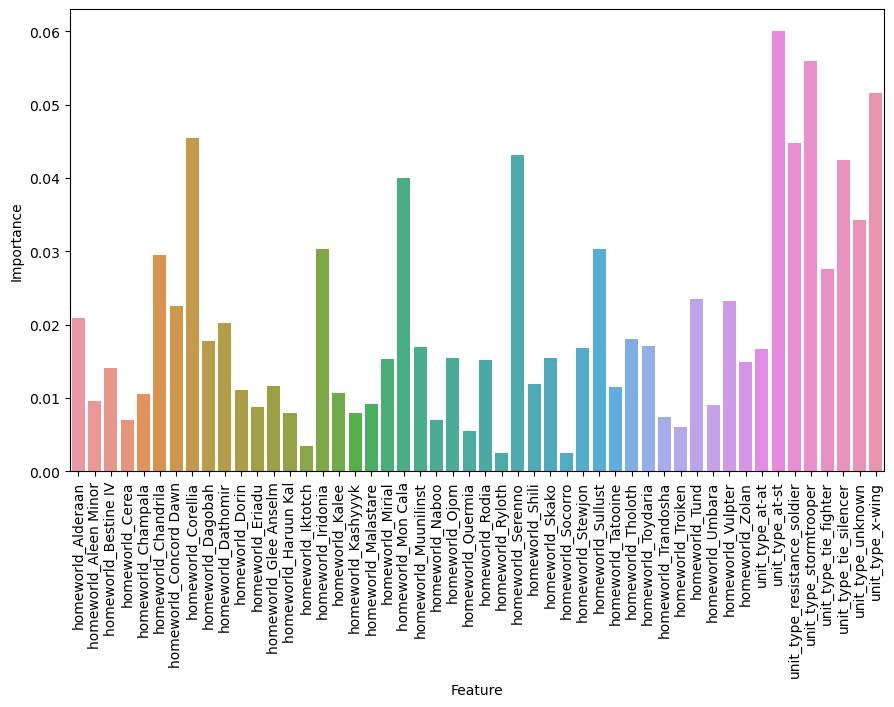

In [84]:
ax = sns.barplot(feature_importances, x = 'Feature', y = 'Importance')
ax.figure.set_size_inches(10.5,6)
plt.xticks(rotation=90)
#fig, ax = plt.subplots(figsize = (10,30))
#plt.figure(figsize = [50,10])

In [85]:
model

DecisionTreeClassifier()

In [86]:
import pickle

In [87]:
filename = 'trained_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [88]:
loaded_model = pickle.load(open(filename, 'rb'))


In [89]:
df_real = pd.read_csv('troop_movements10m.csv')

In [90]:
df_real.head()

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
0,2023-06-13 17:33:18,1,at-st,2.0,8.0,1,1,Glee Anselm
1,2023-06-13 17:33:17,2,tie_silencer,4.0,4.0,0,1,Trandosha
2,2023-06-13 17:33:16,3,at-at,0.0,3.0,6,1,Corellia
3,2023-06-13 17:33:15,4,tie_silencer,6.0,1.0,6,9,Shili
4,2023-06-13 17:33:14,5,tie_fighter,0.0,4.0,9,6,Muunilinst


In [91]:
df_new = df_real.replace("invalid_unit", "unknown")


In [92]:
df_new[['location_x', 'location_y']] = df_new[['location_x', 'location_y']].fillna(method = "ffill")

In [93]:
df_new.iloc[[9999999]]

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
9999999,2023-02-18 10:26:16,10000000,unknown,6.0,6.0,3,0,Skako


In [94]:
pip install pyarrow


Note: you may need to restart the kernel to use updated packages.


In [95]:
pip install fastparquet

In [96]:
import pyarrow as pa
import pyarrow.parquet as pq
table = pa.Table.from_pandas(df_new)
pq.write_table(table, 'troop_movements10m.parquet')


In [97]:
datatrain = pd.read_parquet('troop_movements10m.parquet', engine='pyarrow')


In [98]:
feature_train = ['homeworld', 'unit_type']

x = datatrain[feature_train]
x_encoded_train = pd.get_dummies(x)


In [99]:
x_encoded_train

,homeworld_Alderaan,homeworld_Aleen Minor,homeworld_Bestine IV,homeworld_Cerea,homeworld_Champala,homeworld_Chandrila,homeworld_Concord Dawn,homeworld_Corellia,homeworld_Dagobah,homeworld_Dathomir,...,homeworld_Vulpter,homeworld_Zolan,unit_type_at-at,unit_type_at-st,unit_type_resistance_soldier,unit_type_stormtrooper,unit_type_tie_fighter,unit_type_tie_silencer,unit_type_unknown,unit_type_x-wing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9999996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9999997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9999998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [104]:
with open('trained_model.pkl', 'rb') as f:
    model = pickle.load(f)

predictions = model.predict(x_encoded_train)
datatrain['prediction'] = predictions

In [107]:
datatrain.iloc[555]

timestamp        2023-06-13 17:24:06
unit_id                          556
unit_type                      at-st
location_x                       1.0
location_y                       7.0
destination_x                      0
destination_y                      5
homeworld                   Alderaan
prediction                      True
Name: 555, dtype: object

In [102]:
data.iloc[9999999]

homeworld_Alderaan                  0
homeworld_Aleen Minor               0
homeworld_Bestine IV                0
homeworld_Cerea                     0
homeworld_Champala                  0
homeworld_Chandrila                 0
homeworld_Concord Dawn              0
homeworld_Corellia                  0
homeworld_Dagobah                   0
homeworld_Dathomir                  0
homeworld_Dorin                     0
homeworld_Eriadu                    0
homeworld_Glee Anselm               0
homeworld_Haruun Kal                0
homeworld_Iktotch                   0
homeworld_Iridonia                  0
homeworld_Kalee                     0
homeworld_Kashyyyk                  0
homeworld_Malastare                 0
homeworld_Mirial                    0
homeworld_Mon Cala                  0
homeworld_Muunilinst                0
homeworld_Naboo                     0
homeworld_Ojom                      0
homeworld_Quermia                   0
homeworld_Rodia                     0
homeworld_Ry

In [103]:
datatrain.head()

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
0,2023-06-13 17:33:18,1,at-st,2.0,8.0,1,1,Glee Anselm
1,2023-06-13 17:33:17,2,tie_silencer,4.0,4.0,0,1,Trandosha
2,2023-06-13 17:33:16,3,at-at,0.0,3.0,6,1,Corellia
3,2023-06-13 17:33:15,4,tie_silencer,6.0,1.0,6,9,Shili
4,2023-06-13 17:33:14,5,tie_fighter,0.0,4.0,9,6,Muunilinst
